<a href="https://colab.research.google.com/github/Nayem-3/Assignment_edge/blob/main/Assignment_edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None

Missing Values:
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

Summary Statistics:
                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00

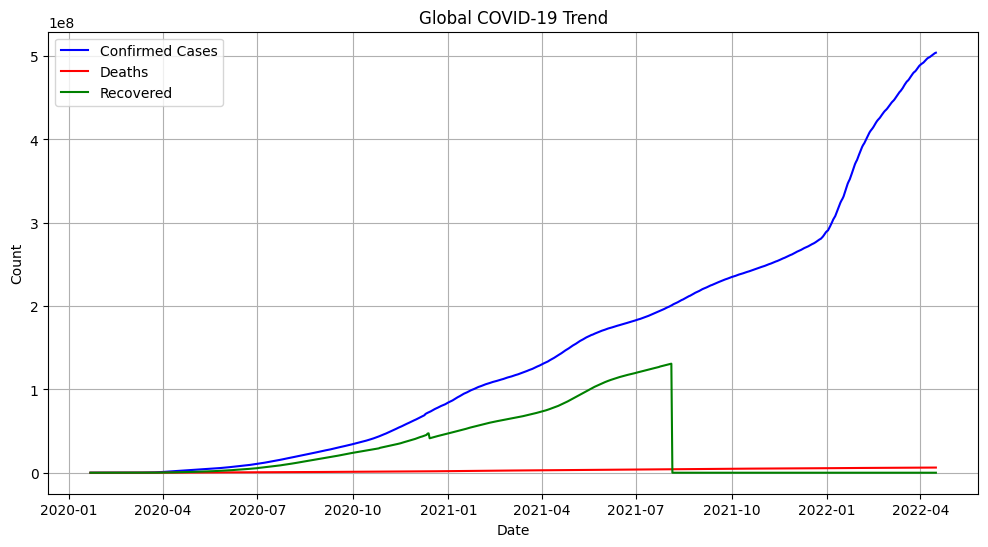

<ipython-input-2-faa1e12dc165>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries["Confirmed"], palette="coolwarm")


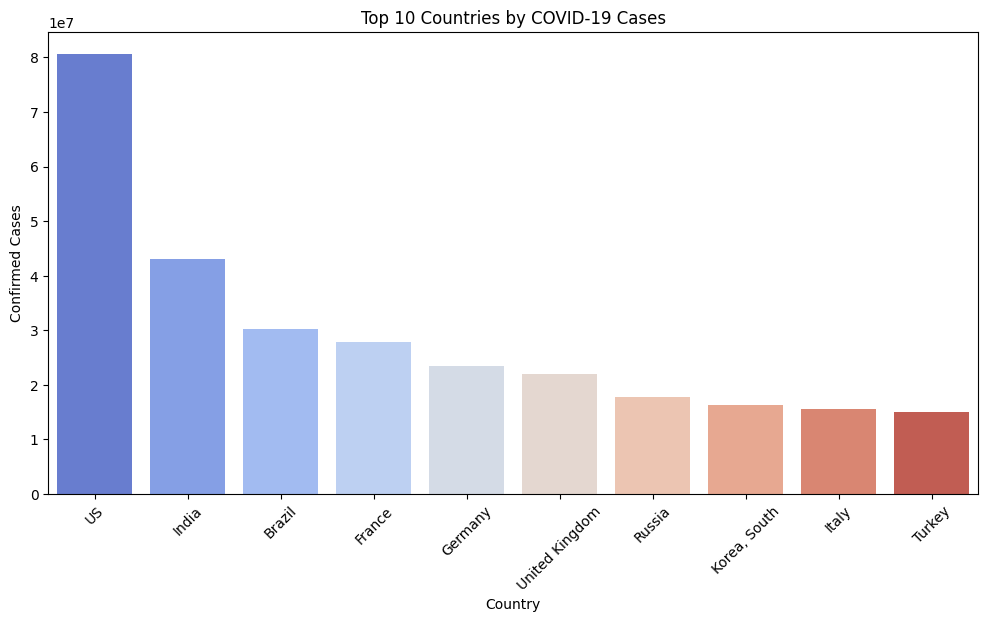

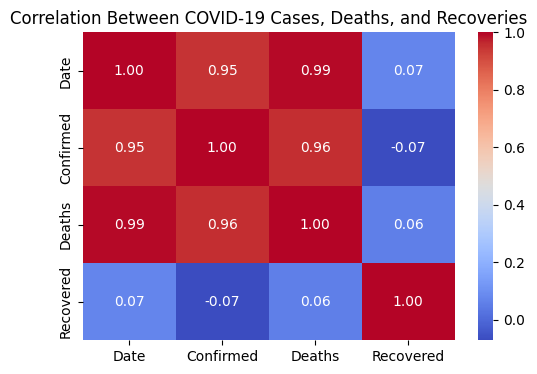

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load the dataset (Replace with actual file path or URL)
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# 🔹 Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 🔹 Basic Information
print("Dataset Overview:")
print(df.info())

# 🔹 Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 🔹 Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# 🔹 Total Cases, Deaths, and Recoveries Over Time
df_global = df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_global["Date"], df_global["Confirmed"], label="Confirmed Cases", color="blue")
plt.plot(df_global["Date"], df_global["Deaths"], label="Deaths", color="red")
plt.plot(df_global["Date"], df_global["Recovered"], label="Recovered", color="green")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Global COVID-19 Trend")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Top 10 Most Affected Countries
latest_data = df[df["Date"] == df["Date"].max()]
top_countries = latest_data.groupby("Country")[["Confirmed", "Deaths", "Recovered"]].sum().sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries["Confirmed"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.show()

# 🔹 Correlation Analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df_global.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between COVID-19 Cases, Deaths, and Recoveries")
plt.show()